In [1]:
import cv2

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import utils

In [2]:
img = cv2.imread('./pic/main_frame.png')
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
img.shape

(1920, 1080, 3)

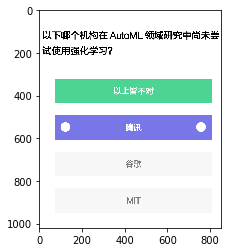

In [39]:
simg = img[900:, 100:950, :]
plt.imshow(simg)

In [5]:
tp_right = cv2.imread('./template/right.png')

In [6]:
match = cv2.matchTemplate(img, tp_right, cv2.TM_CCOEFF_NORMED)

In [7]:
match.shape

(1787, 333)

In [8]:
np.unravel_index(match.argmax(), match.shape)

(1210, 168)

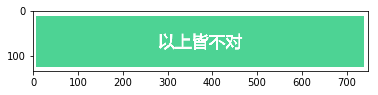

In [9]:
plt.imshow(img[1210: 1210 + tp_right.shape[0], 168: 168 + tp_right.shape[1]])

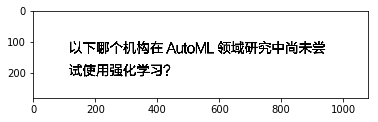

In [10]:
plt.imshow(simg[0:280, 0:1080, :])

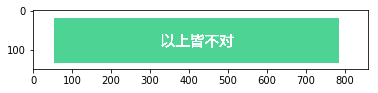

In [11]:
plt.imshow(simg[300:450, 120: 980, :])

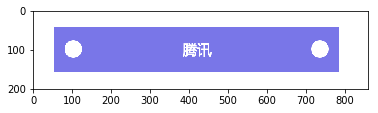

In [12]:
plt.imshow(simg[450:650, 120: 980, :])

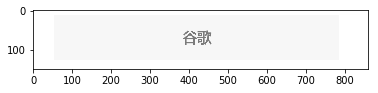

In [13]:
plt.imshow(simg[650:800, 120: 980, :])

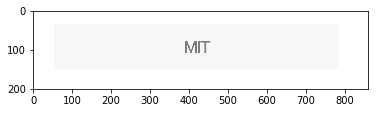

In [14]:
plt.imshow(simg[800:1000, 120: 980, :])

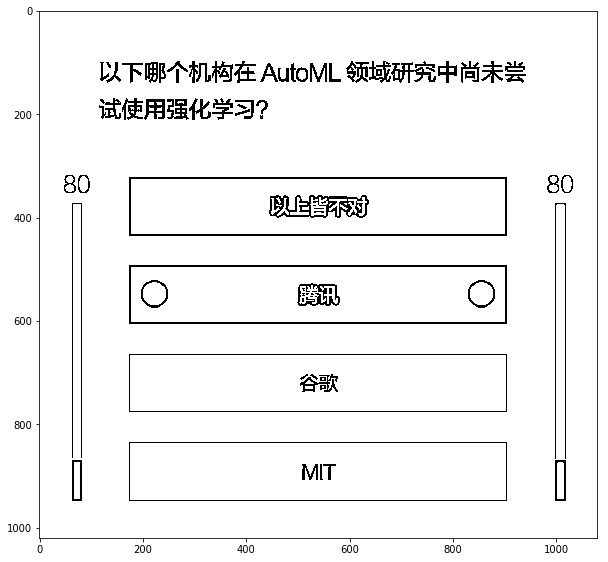

In [23]:
f = plt.figure(figsize=(10, 20))
f.gca().imshow(cv2.adaptiveThreshold(cv2.cvtColor(simg, cv2.COLOR_BGR2GRAY), 
                                 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2), cmap='gray')

In [15]:
regions = [(0, 280, 0, 1080), (300, 450, 120, 980), (450, 650, 120, 980), (650, 800, 120, 980), (800, 1000, 120, 980)]

In [59]:
rst = utils.ocr(simg, regions)
rst

['以下哪个机构在 AutoM领域研究中尚未试使用强化学习?', '以上皆不对', '腾讯', '谷歌', 'MIT']

In [25]:
import key
from aip import AipOcr

client = AipOcr(key.AIP_APP_ID, key.AIP_API_KEY, key.AIP_SECRET_KEY)

In [44]:
_, byte_arr = cv2.imencode('.jpg', cv2.cvtColor(simg, cv2.COLOR_BGR2GRAY), [int(cv2.IMWRITE_JPEG_QUALITY), 80])
client.basicGeneral(byte_arr.tobytes())

{'log_id': 6011198877277733469,
 'words_result_num': 6,
 'words_result': [{'words': '以下哪个机构在 AutoM领域研究中尚未尝'},
  {'words': '试使用强化学习?'},
  {'words': '以上皆不对'},
  {'words': '腾讯'},
  {'words': '谷歌'},
  {'words': 'MT'}]}

In [66]:
p = np.unravel_index(match.argmax(), match.shape)

for i, r in enumerate(regions[1:]):
    if p[0] - 900 > r[0] and p[0] - 900 < r[1]:
        print(i)

0


In [1]:
import lmdb

In [2]:
env = lmdb.open('db')

In [19]:
env.stat()

{'psize': 4096,
 'depth': 2,
 'branch_pages': 1,
 'leaf_pages': 13,
 'overflow_pages': 0,
 'entries': 398}

In [8]:
with env.begin(write=True) as txn:
    txn.put('以下哪个机构在 AutoM领域研究中尚未试使用强化学习?'.encode(), '以上皆不对'.encode())

In [13]:
with env.begin() as txn:
    print(txn.get('以下哪个机构在 AutoM领域研究中尚未试使用强化学习?'.encode()).decode())
    print(txn.get('aaa'.encode()).decode())

以上皆不对


AttributeError: 'NoneType' object has no attribute 'decode'